In [1]:
# %load_ext autoreload
%reload_ext autoreload
%autoreload 2
import numpy as np

# from src.GridWorldMDP.utils import draw_path, generate_demonstrations, init_grid_world
from src.deepmaxent_irl_gridword import run_deepmaxent_irl
from src.maxent_irl_gridworld import run_maxent_irl
from src.img_utils import Visualizer, get_evd, draw_evd
from src.argument_parser import get_parser, parse_args_str

PARSER = get_parser()

In [2]:
np.random.seed(1)
BASIC_ARGS = """
--exp_name test
--height 6
--width 6
"""
args = parse_args_str(PARSER, BASIC_ARGS)
print(args.exp_name)
coor_rates = [
    ((args.height-2, args.width-2), 1.0), 
    ((0, args.width-1), 0.5), 
    ((1, 1), 0.5)
]
init_start_pos = np.random.randint(0, args.height, size=(args.n_query, 2)).tolist()
print('start positions: ', init_start_pos)

test
start positions:  [[5, 3]]


## Maxent

In [ ]:
MAXENT_ARGS = """
--exp_name maxent_rand
--height 6
--width 6
--gamma 0.8
--act_random 0.3
--n_trajs 10
--l_traj 6
--learning_rate 0.1
--n_iters 100
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 0.5
--active
"""
args = parse_args_str(PARSER, MAXENT_ARGS)
print(args.exp_name)

history_maxent_active = run_maxent_irl(args, coor_rates, init_start_pos=init_start_pos)

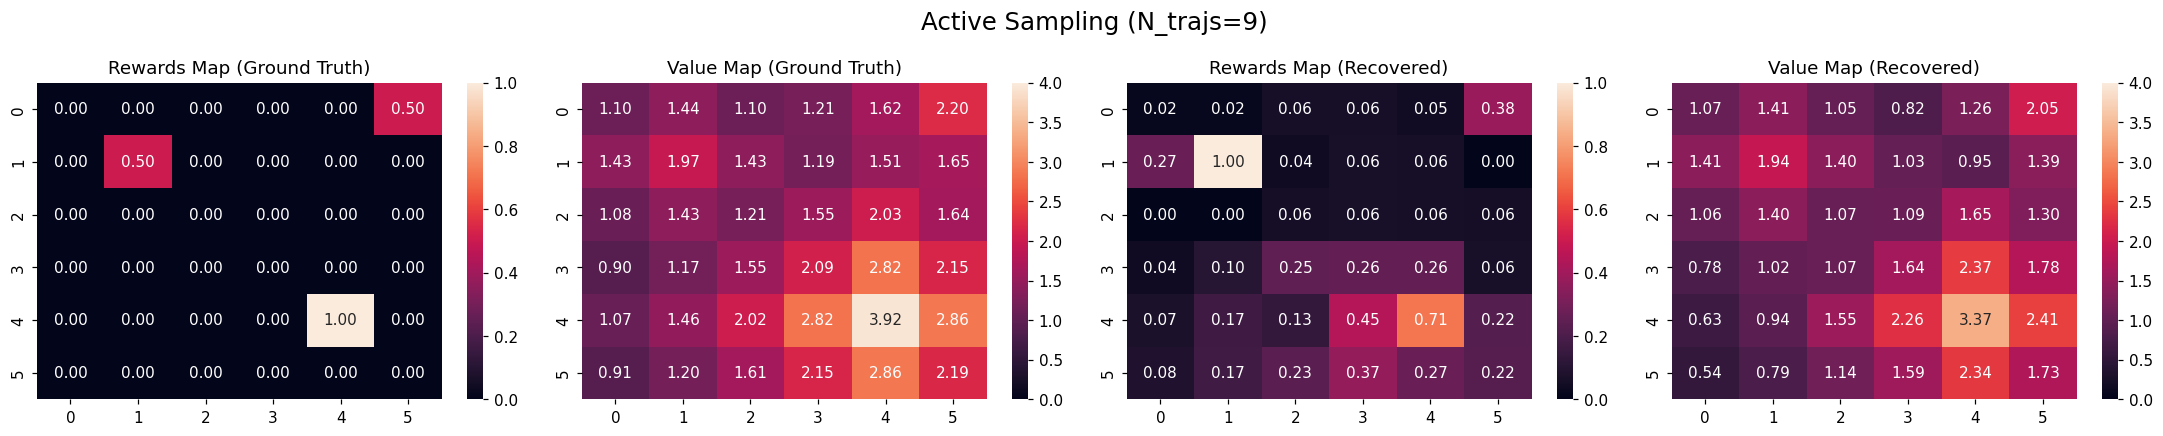

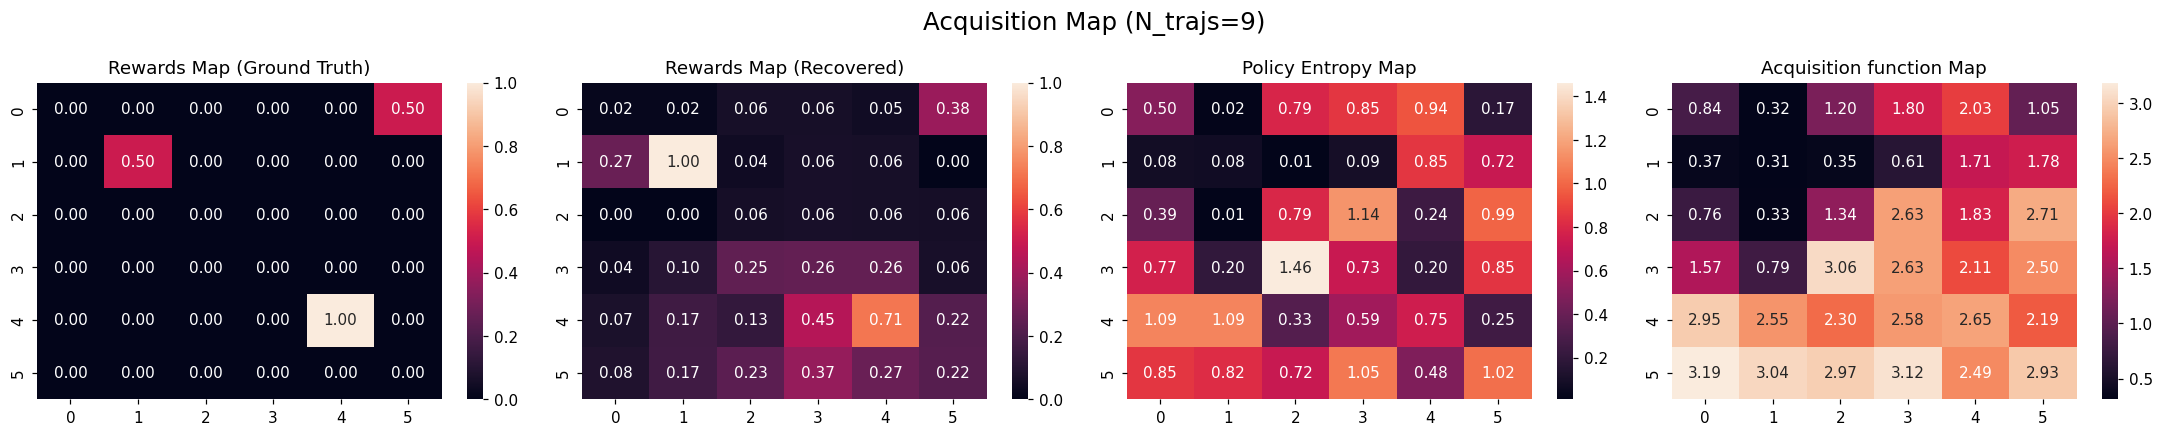

In [24]:
visualizer = Visualizer(history_maxent_active, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)
visualizer.draw_acq_maps(search_idx)

---

## Deep Maxent

In [4]:
init_start_pos

[[5, 3]]

In [14]:
DEEP_MAXENT_ACTIVE_ARGS = """
--exp_name deepmaxent_active
--height 6
--width 6
--gamma 0.8
--act_random 0.3
--n_trajs 10
--l_traj 6
--learning_rate 0.02
--n_iters 30
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 1.0
--weight_decay 0.5
--hiddens 3 3
--device cuda
--active
--verbose 2
"""

# becareful of learning rate will cause nan
args = parse_args_str(PARSER, DEEP_MAXENT_ACTIVE_ARGS)
print(args.exp_name)
history_deepmaxent_active = run_deepmaxent_irl(args, coor_rates, init_start_pos=init_start_pos)

deepmaxent_active
[INFO] Initialize Grid World
[INFO] Getting ground truth values and policy via value teration
[INFO] Initialize trajectories
[INFO - n_trajs:1] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:1--
[[0.5083 0.5171 0.6015 0.5285 0.5189 0.5346]
 [0.6353 0.4857 0.4588 0.5512 0.6328 0.5505]
 [0.5049 0.4803 0.5867 0.4584 0.542  0.5821]
 [0.585  0.5714 0.5836 0.6017 0.636  0.5768]
 [0.5936 0.5503 0.6333 0.     1.     0.1131]
 [0.5694 0.6041 0.006  0.1996 0.4666 0.0901]]
[INFO - n_trajs:1] Policy evaluation
-- evd = 0.533553 ---
[INFO - n_trajs:1] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:1--
[[3.6405 4.3722 4.21   3.8915 2.6453 3.4373]
 [3.5502 4.0936 3.7308 2.778  2.0312 2.996 ]
 [4.2745 3.6849 2.7122 1.7356 0.8309 2.1123]
 [4.315  3.0973 1.627  0.726  0.5404 0.8248]
 [4.6339 4.233  2.5439 0.4697 0.4786 0.3652]
 [4.2357 4.2055 2.744  0.4228 0.3585 0.3591]]
[INFO - n_trajs:1] Generating a new demonstrations from [(4, 0)]
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [1 1 1 1 4 0]
 [0 0 0 1 1 0]]
[INFO - n_trajs:2] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:2--
[[0.5761 0.5826 0.6132 0.5657 0.5717 0.633 ]
 [0.5172 0.5994 0.5876 0.561  0.6031 0.6578]
 [0.6778 0.5449 0.5318 1.     0.6041 0.5323]
 [0.0326 0.1986 0.1875 0.9806 0.2643 0.6005]
 [0.0264 0.6703 0.8745 0.7603 0.9586 0.1514]
 [0.2114 0.     0.0181 0.1304 0.7608 0.2383]]
[INFO - n_trajs:2] Policy evaluation
-- evd = 1.428892 ---
[INFO - n_trajs:2] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:2--
[[3.7996 3.6019 3.0552 1.9643 3.07   3.5735]
 [3.3721 2.8349 2.4635 1.9874 2.5398 3.2441]
 [2.415  1.7315 1.9381 2.703  2.0051 1.9196]
 [1.8253 2.2871 2.1773 2.8342 2.5412 2.9084]
 [1.275  1.8308 2.5375 2.8037 2.947  2.0829]
 [1.8083 1.288  1.7533 2.3945 2.4983 1.7591]]
[INFO - n_trajs:2] Generating a new demonstrations from [(0, 0)]
Visitation Frequency
[[1 2 1 0 0 0]
 [0 2 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [1 1 1 1 4 0]
 [0 0 0 1 1 0]]
[INFO - n_trajs:3] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:3--
[[0.192  0.7991 0.8826 0.1223 0.2301 0.1917]
 [0.1201 0.9347 0.136  0.0464 0.1023 0.5973]
 [0.1793 0.2071 0.0692 1.     0.575  0.5991]
 [0.0134 0.0227 0.2269 0.9931 0.3496 0.521 ]
 [0.0672 0.6005 0.8417 0.7599 0.9904 0.0553]
 [0.1523 0.0673 0.0939 0.     0.7728 0.1281]]
[INFO - n_trajs:3] Policy evaluation
-- evd = 1.236749 ---
[INFO - n_trajs:3] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:3--
[[2.2576 3.258  2.5876 1.776  1.8156 1.052 ]
 [1.9934 2.8624 2.6235 1.7999 1.3188 1.5017]
 [2.0917 1.9831 1.8478 2.5954 1.8306 1.6573]
 [2.2761 2.0678 2.047  2.8225 2.5333 2.3513]
 [1.1434 1.6152 2.3437 2.7735 2.5311 1.7559]
 [1.5615 1.1469 1.6141 2.3827 2.1046 1.442 ]]
[INFO - n_trajs:3] Generating a new demonstrations from [(0, 1)]
Visitation Frequency
[[1 3 1 0 0 0]
 [1 5 0 0 0 0]
 [0 1 0 1 0 0]
 [0 0 0 1 0 0]
 [1 1 1 1 4 0]
 [0 0 0 1 1 0]]
[INFO - n_trajs:4] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:4--
[[0.1897 0.6177 0.7462 0.3045 0.2873 0.3931]
 [0.6708 0.9485 0.027  0.2297 0.2379 0.2657]
 [0.2454 0.8585 0.0638 0.9721 0.276  0.5993]
 [0.     0.0778 0.1881 0.9857 0.24   0.5869]
 [0.1764 0.5922 0.8384 0.7032 1.     0.1198]
 [0.2866 0.0093 0.1799 0.1485 0.6826 0.2549]]
[INFO - n_trajs:4] Policy evaluation
-- evd = 0.875805 ---
[INFO - n_trajs:4] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:4--
[[1.3802 0.8989 1.2834 0.9738 0.9102 1.5315]
 [0.905  1.1634 0.8913 1.4447 1.5878 1.2696]
 [1.0239 1.14   1.5085 2.1584 1.5345 1.7953]
 [0.9068 0.8455 1.5533 2.253  1.942  1.7519]
 [0.7914 1.1831 1.7953 2.0031 0.8417 0.609 ]
 [0.866  0.8164 1.2371 1.6608 0.6478 0.4242]]
[INFO - n_trajs:4] Generating a new demonstrations from [(3, 3)]
Visitation Frequency
[[1 3 1 0 0 0]
 [1 5 0 0 0 0]
 [0 1 0 1 0 0]
 [0 0 0 2 3 0]
 [1 1 1 1 6 0]
 [0 0 0 1 1 0]]
[INFO - n_trajs:5] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:5--
[[0.0395 0.7395 0.7083 0.2421 0.2173 0.242 ]
 [0.6839 1.     0.0457 0.2521 0.2504 0.2536]
 [0.1026 0.8892 0.2496 0.9294 0.088  0.2496]
 [0.187  0.0324 0.2279 0.8564 0.8496 0.1532]
 [0.1051 0.6954 0.8489 0.621  0.8828 0.0698]
 [0.0826 0.0526 0.     0.0573 0.6816 0.2055]]
[INFO - n_trajs:5] Policy evaluation
-- evd = 1.006377 ---
[INFO - n_trajs:5] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:5--
[[2.2079 2.2141 2.0207 1.4738 1.3388 1.9691]
 [1.9933 2.492  1.8434 2.199  2.3591 2.7201]
 [2.0032 2.1906 2.4493 3.2532 3.1888 2.9297]
 [2.0731 1.6709 2.9734 3.8927 3.8638 2.6875]
 [1.7387 2.5299 3.4007 3.7738 3.7112 2.5426]
 [1.9905 1.7537 2.3501 3.1475 2.9187 2.0427]]
[INFO - n_trajs:5] Generating a new demonstrations from [(3, 3)]
Visitation Frequency
[[1 3 1 0 0 0]
 [1 5 0 0 0 0]
 [0 1 0 1 0 0]
 [0 0 0 3 4 0]
 [1 1 1 1 7 2]
 [0 0 0 1 1 1]]
[INFO - n_trajs:6] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:6--
[[0.0439 0.7632 0.7095 0.065  0.3296 0.2754]
 [0.6393 0.9923 0.0881 0.2303 0.2894 0.1589]
 [0.2932 0.935  0.0124 0.8993 0.     0.3885]
 [0.2002 0.1773 0.049  0.7779 0.9658 0.1606]
 [0.0861 0.7544 0.8879 0.4661 1.     0.948 ]
 [0.1786 0.1197 0.2705 0.1701 0.5403 0.8828]]
[INFO - n_trajs:6] Policy evaluation
-- evd = 0.899642 ---
[INFO - n_trajs:6] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:6--
[[2.6835 2.9747 2.6374 1.9668 2.7159 3.0728]
 [2.6257 3.2736 2.4184 1.9364 2.473  2.3668]
 [2.4645 2.8739 2.6604 2.6716 2.5195 2.6803]
 [2.4442 2.2281 2.6401 2.9567 3.3132 3.1819]
 [1.8445 2.5644 3.1028 2.9456 3.7711 3.6732]
 [2.3227 1.9856 2.293  2.9755 3.3847 3.1858]]
[INFO - n_trajs:6] Generating a new demonstrations from [(4, 4)]
Visitation Frequency
[[ 1  3  1  0  0  0]
 [ 1  5  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  0  0  3  5  0]
 [ 1  1  1  2 11  2]
 [ 0  0  0  1  1  1]]
[INFO - n_trajs:7] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:7--
[[0.2181 0.6703 0.73   0.0247 0.1931 0.3239]
 [0.6672 0.8996 0.202  0.3565 0.2084 0.2142]
 [0.1818 0.8366 0.     0.9129 0.1425 0.2445]
 [0.2007 0.0515 0.2389 0.7617 0.9491 0.1367]
 [0.1744 0.6046 0.7936 0.7153 1.     0.8322]
 [0.0738 0.1543 0.296  0.1709 0.5752 0.7642]]
[INFO - n_trajs:7] Policy evaluation
-- evd = 0.410265 ---
[INFO - n_trajs:7] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:7--
[[2.189  2.057  2.1302 1.7344 2.0417 2.5827]
 [1.9151 2.3575 1.7161 1.4738 1.918  2.1866]
 [1.9259 2.0789 1.6915 2.0797 1.7595 2.2303]
 [1.8889 1.6042 1.7635 2.1164 2.3226 2.3214]
 [0.7673 1.0683 1.5522 1.9039 2.5451 2.3163]
 [1.3315 0.8896 1.0596 1.7686 1.8893 2.3966]]
[INFO - n_trajs:7] Generating a new demonstrations from [(0, 5)]
Visitation Frequency
[[ 1  3  1  0  0  5]
 [ 1  5  0  0  0  1]
 [ 0  1  0  1  0  0]
 [ 0  0  0  3  5  0]
 [ 1  1  1  2 11  2]
 [ 0  0  0  1  1  1]]
[INFO - n_trajs:8] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:8--
[[0.1526 0.6753 0.653  0.1445 0.1176 0.8768]
 [0.6318 0.9039 0.1739 0.1134 0.2812 0.613 ]
 [0.2816 0.8561 0.0605 0.9362 0.0479 0.2385]
 [0.1624 0.     0.2211 0.77   0.9681 0.1053]
 [0.2031 0.7863 0.902  0.7829 1.     0.9136]
 [0.219  0.107  0.3546 0.1247 0.5679 0.772 ]]
[INFO - n_trajs:8] Policy evaluation
-- evd = 0.656721 ---
[INFO - n_trajs:8] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:8--
[[2.9908 3.1486 2.9099 2.4322 0.519  0.4862]
 [2.9297 3.489  2.6463 2.1371 1.4856 0.8986]
 [2.7797 3.0877 2.7211 3.0785 2.715  2.2283]
 [2.9155 2.873  3.1934 3.6322 3.5761 3.3239]
 [1.8089 2.5142 3.2122 3.5461 4.0535 3.7067]
 [2.2748 1.9954 2.3179 2.9907 3.3343 3.43  ]]
[INFO - n_trajs:8] Generating a new demonstrations from [(4, 4)]
Visitation Frequency
[[ 1  3  1  0  0  5]
 [ 1  5  0  0  0  1]
 [ 0  1  0  1  0  0]
 [ 0  0  0  3  5  0]
 [ 1  1  1  3 15  2]
 [ 0  0  0  1  2  1]]
[INFO - n_trajs:9] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:9--
[[0.1439 0.6932 0.7021 0.2813 0.1321 1.    ]
 [0.6987 0.9645 0.0611 0.2242 0.0982 0.8339]
 [0.2307 0.8275 0.167  0.9414 0.1113 0.3356]
 [0.2672 0.2048 0.1985 0.7467 0.9778 0.    ]
 [0.2212 0.6832 0.8147 0.7848 0.9517 0.7679]
 [0.3164 0.1118 0.1119 0.2809 0.7698 0.7205]]
[INFO - n_trajs:9] Policy evaluation
-- evd = 0.421112 ---
[INFO - n_trajs:9] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:9--
[[1.8398 1.5043 1.5192 1.5057 0.2625 0.2693]
 [1.4624 1.7447 1.3031 1.6588 0.4657 0.4675]
 [1.6901 1.5743 2.1565 2.5503 2.0643 0.5081]
 [1.8988 1.3037 2.2759 2.7028 2.9324 2.2717]
 [0.9733 1.409  2.0421 2.5932 3.2274 2.6115]
 [1.3521 0.9495 1.4122 2.5724 2.6558 3.1511]]
[INFO - n_trajs:9] Generating a new demonstrations from [(4, 4)]
Visitation Frequency
[[ 1  3  1  0  0  5]
 [ 1  5  0  0  0  1]
 [ 0  1  0  1  0  0]
 [ 0  0  0  3  5  0]
 [ 1  1  1  3 21  2]
 [ 0  0  0  1  2  1]]
[INFO - n_trajs:10] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:10--
[[0.0399 0.7477 0.7884 0.1409 0.0504 0.9718]
 [0.7492 1.     0.1325 0.1265 0.0991 0.7503]
 [0.1857 0.9752 0.1454 0.9205 0.1902 0.107 ]
 [0.1644 0.0766 0.1036 0.7798 0.9563 0.1428]
 [0.1315 0.7006 0.8648 0.7374 0.9946 0.8167]
 [0.0733 0.0577 0.1236 0.     0.757  0.6441]]
[INFO - n_trajs:10] Policy evaluation
-- evd = 0.453442 ---


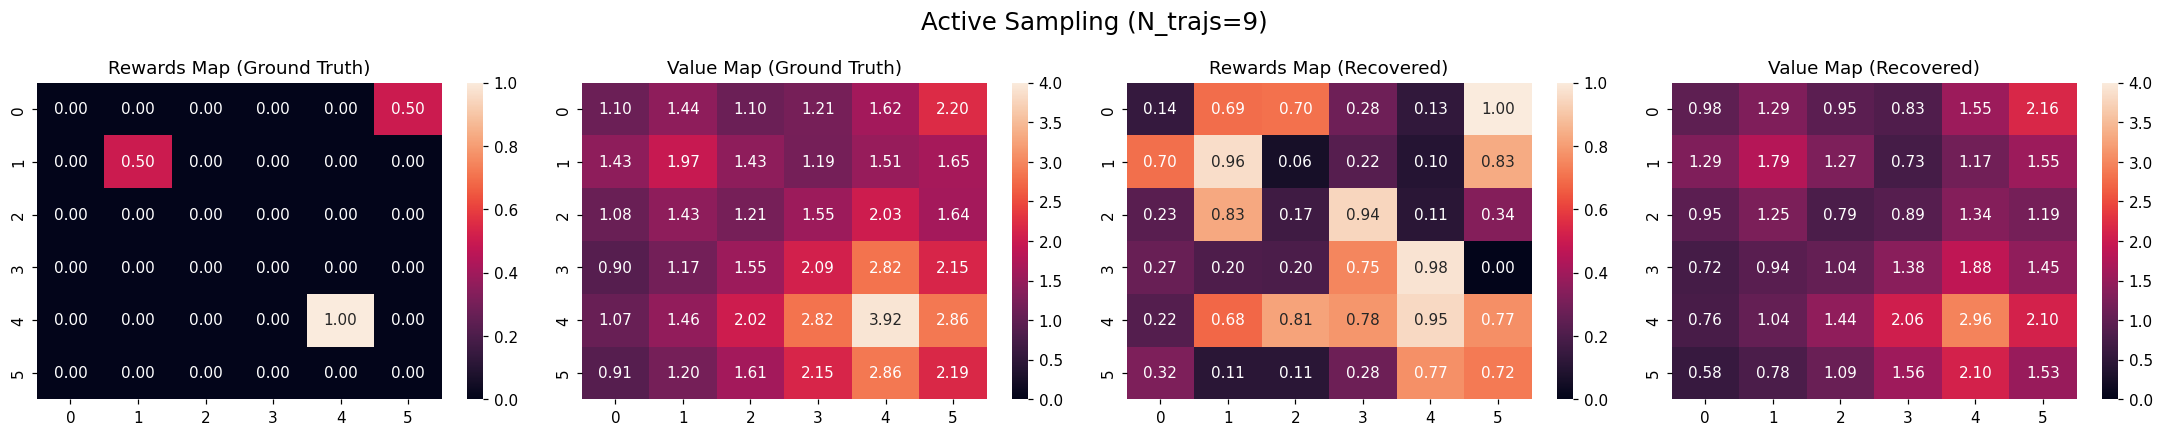

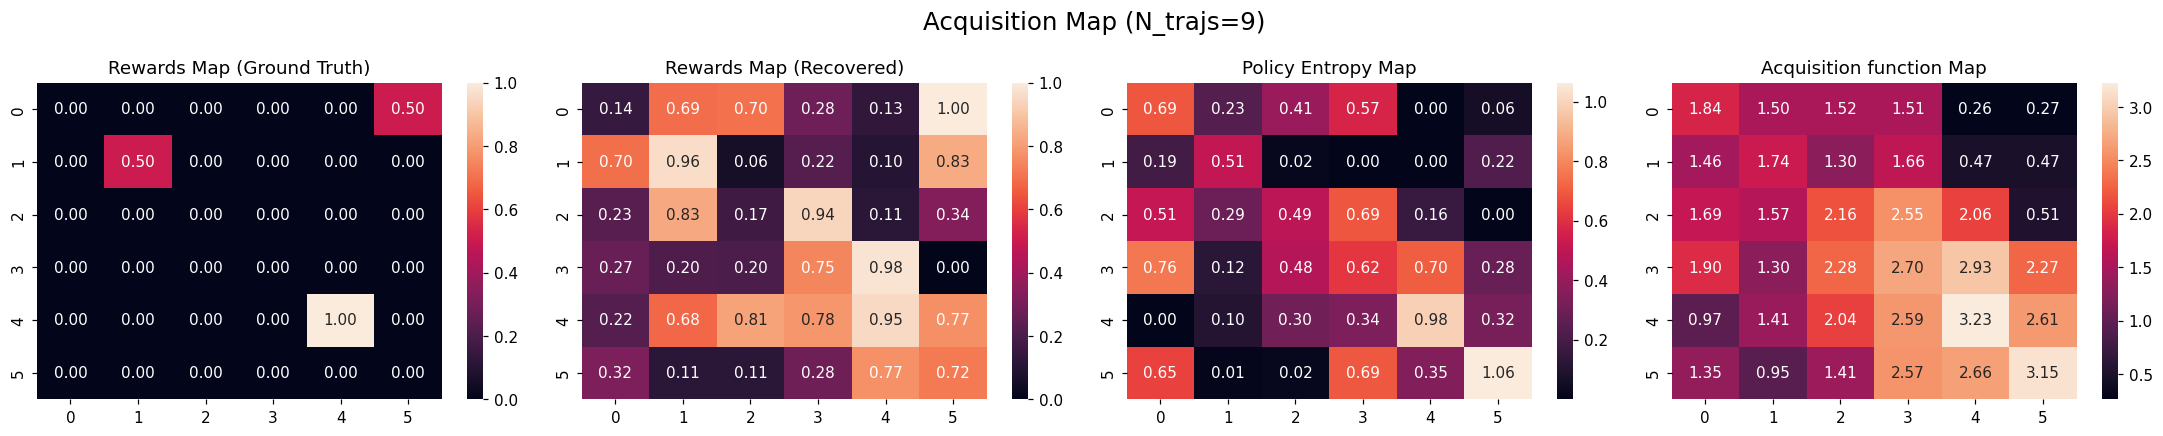

In [19]:
visualizer = Visualizer(history_deepmaxent_active, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)
visualizer.draw_acq_maps(search_idx)

In [16]:
DEEP_MAXENT_RANDOM_ARGS = """
--exp_name deepmaxent_random
--height 6
--width 6
--gamma 0.8
--act_random 0.3
--n_trajs 10
--l_traj 6
--learning_rate 0.02
--n_iters 30
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 1.0
--weight_decay 0.5
--hiddens 3 3
--device cuda
--verbose 2
"""

# becareful of learning rate will cause nan
args = parse_args_str(PARSER, DEEP_MAXENT_RANDOM_ARGS)
print(args.exp_name)
history_deepmaxent_random = run_deepmaxent_irl(args, coor_rates, init_start_pos=init_start_pos)

deepmaxent_random
[INFO] Initialize Grid World
[INFO] Getting ground truth values and policy via value teration
[INFO] Initialize trajectories
[INFO - n_trajs:1] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:1--
[[0.5294 0.6152 0.5617 0.6162 0.6436 0.6139]
 [0.5253 0.4934 0.5848 0.5632 0.5377 0.5899]
 [0.6248 0.5373 0.5178 0.6258 0.5752 0.5086]
 [0.5831 0.4856 0.5849 0.5166 0.5929 0.5912]
 [0.4937 0.473  0.54   0.1814 1.     0.    ]
 [0.4961 0.6012 0.1194 0.0596 0.5463 0.1076]]
[INFO - n_trajs:1] Policy evaluation
-- evd = 0.819847 ---
[INFO - n_trajs:1] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 4 0]
 [0 1 2 2 2 1]]
[INFO - n_trajs:2] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:2--
[[0.5408 0.6144 0.5635 0.492  0.5126 0.5891]
 [0.5339 0.6247 0.5459 0.5405 0.6356 0.6162]
 [0.5182 0.5857 0.6142 0.518  0.5119 0.4968]
 [0.5358 0.6595 0.6264 0.5356 0.5367 0.614 ]
 [0.638  0.     0.2022 0.111  1.     0.2219]
 [0.0209 0.0058 0.7213 0.3968 0.849  0.8328]]
[INFO - n_trajs:2] Policy evaluation
-- evd = 1.234701 ---
[INFO - n_trajs:2] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 8 0]
 [0 1 2 2 4 1]]
[INFO - n_trajs:3] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:3--
[[0.5875 0.5799 0.5779 0.477  0.4691 0.5565]
 [0.578  0.5451 0.4971 0.5706 0.5149 0.5073]
 [0.5787 0.5464 0.5326 0.5134 0.576  0.5289]
 [0.5629 0.5144 0.5579 0.5417 0.0438 0.1697]
 [0.5553 0.     0.1068 0.0683 1.     0.0619]
 [0.0792 0.1126 0.701  0.44   0.8342 0.6945]]
[INFO - n_trajs:3] Policy evaluation
-- evd = 1.136009 ---
[INFO - n_trajs:3] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 1 0 0 0 0]
 [2 1 1 0 0 0]
 [0 0 0 0 8 0]
 [0 1 2 2 4 1]]
[INFO - n_trajs:4] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:4--
[[0.5688 0.5926 0.5805 0.6333 0.6426 0.594 ]
 [0.6046 0.6292 0.6331 0.6071 0.6283 0.5666]
 [0.8594 0.96   0.3829 0.2475 0.3875 0.574 ]
 [0.7951 0.8545 0.9616 0.1407 0.0481 0.2188]
 [0.1552 0.     0.1736 0.1124 1.     0.1589]
 [0.047  0.0016 0.7018 0.6635 0.8252 0.677 ]]
[INFO - n_trajs:4] Policy evaluation
-- evd = 1.116268 ---
[INFO - n_trajs:4] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 1 0 0 0 0]
 [2 2 3 1 0 0]
 [0 0 0 1 8 0]
 [0 1 2 3 4 1]]
[INFO - n_trajs:5] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:5--
[[0.7942 0.7758 0.7476 0.7687 0.773  0.7039]
 [0.7184 0.743  0.728  0.7515 0.7072 0.7402]
 [0.9385 0.9576 0.0945 0.2364 0.3291 0.4952]
 [0.8117 0.8309 0.9919 1.     0.0713 0.4213]
 [0.2636 0.2569 0.214  0.9219 0.9972 0.    ]
 [0.4006 0.305  0.9349 0.8684 0.9695 0.9124]]
[INFO - n_trajs:5] Policy evaluation
-- evd = 1.406460 ---
[INFO - n_trajs:5] Generating a new demonstrations from Random Points
Visitation Frequency
[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  1  0  0  0  0]
 [ 2  2  3  1  1  0]
 [ 0  0  0  1 11  0]
 [ 0  1  2  3  6  1]]
[INFO - n_trajs:6] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:6--
[[0.5256 0.6479 0.5967 0.6273 0.5559 0.6116]
 [0.6611 0.5501 0.6569 0.6163 0.5748 0.5742]
 [0.7799 0.9168 0.1619 0.1179 0.2736 0.3302]
 [0.734  0.7181 0.9739 0.8008 0.1863 0.2893]
 [0.2388 0.1863 0.     0.8432 1.     0.1011]
 [0.3856 0.294  0.8099 0.7521 0.9214 0.8   ]]
[INFO - n_trajs:6] Policy evaluation
-- evd = 1.189125 ---
[INFO - n_trajs:6] Generating a new demonstrations from Random Points
Visitation Frequency
[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  1  0  0  1  0]
 [ 2  2  3  1  3  0]
 [ 0  0  0  1 14  0]
 [ 0  1  2  3  6  1]]
[INFO - n_trajs:7] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:7--
[[0.6198 0.5028 0.5165 0.5589 0.4802 0.4918]
 [0.5676 0.5376 0.5068 0.4628 0.0764 0.2209]
 [0.7103 0.8087 0.1359 0.2125 0.0839 0.0348]
 [0.6705 0.6731 0.9222 0.6644 0.7825 0.254 ]
 [0.2298 0.0827 0.0654 0.8052 1.     0.    ]
 [0.1027 0.1333 0.7705 0.6875 0.8241 0.7904]]
[INFO - n_trajs:7] Policy evaluation
-- evd = 0.587595 ---
[INFO - n_trajs:7] Generating a new demonstrations from Random Points
Visitation Frequency
[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  1  0  0  1  0]
 [ 2  2  3  1  3  0]
 [ 0  0  1  2 17  1]
 [ 0  1  2  3  6  1]]
[INFO - n_trajs:8] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:8--
[[0.6577 0.6431 0.6656 0.6427 0.6041 0.6195]
 [0.653  0.6063 0.6573 0.6144 0.1396 0.2367]
 [0.7666 0.9071 0.1081 0.1323 0.     0.156 ]
 [0.7359 0.7591 0.9206 0.7706 0.7961 0.121 ]
 [0.1599 0.0564 0.1735 0.915  1.     0.7462]
 [0.1751 0.111  0.7377 0.7578 0.9118 0.7506]]
[INFO - n_trajs:8] Policy evaluation
-- evd = 0.881791 ---
[INFO - n_trajs:8] Generating a new demonstrations from Random Points
Visitation Frequency
[[ 0  1  0  0  0  0]
 [ 1  4  0  0  0  0]
 [ 1  1  0  0  1  0]
 [ 2  2  3  1  3  0]
 [ 0  0  1  2 17  1]
 [ 0  1  2  3  6  1]]
[INFO - n_trajs:9] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:9--
[[0.5961 0.9224 0.1799 0.2424 0.2706 0.2957]
 [0.8893 1.     0.116  0.2886 0.0764 0.2469]
 [0.7091 0.655  0.2103 0.0857 0.1806 0.2202]
 [0.699  0.7321 0.9357 0.7722 0.7899 0.2033]
 [0.0823 0.     0.15   0.8563 0.9773 0.6854]
 [0.2263 0.1048 0.5967 0.6211 0.9039 0.6609]]
[INFO - n_trajs:9] Policy evaluation
-- evd = 0.761077 ---
[INFO - n_trajs:9] Generating a new demonstrations from Random Points
Visitation Frequency
[[ 0  1  0  0  0  0]
 [ 1  4  0  0  0  0]
 [ 1  1  0  0  1  0]
 [ 2  2  3  1  3  0]
 [ 0  0  1  2 19  1]
 [ 0  2  3  4  7  1]]
[INFO - n_trajs:10] Training Deep MaxEnt IRL


  0%|          | 0/30 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:10--
[[0.6351 0.9229 0.0715 0.3267 0.2794 0.3328]
 [0.9372 1.     0.     0.1843 0.0271 0.2598]
 [0.8023 0.6912 0.1043 0.1242 0.2026 0.1726]
 [0.7267 0.7358 0.9831 0.8257 0.7621 0.0863]
 [0.1463 0.0433 0.1317 0.9054 0.9655 0.7455]
 [0.2204 0.2591 0.6512 0.6669 0.9326 0.6762]]
[INFO - n_trajs:10] Policy evaluation
-- evd = 0.953083 ---


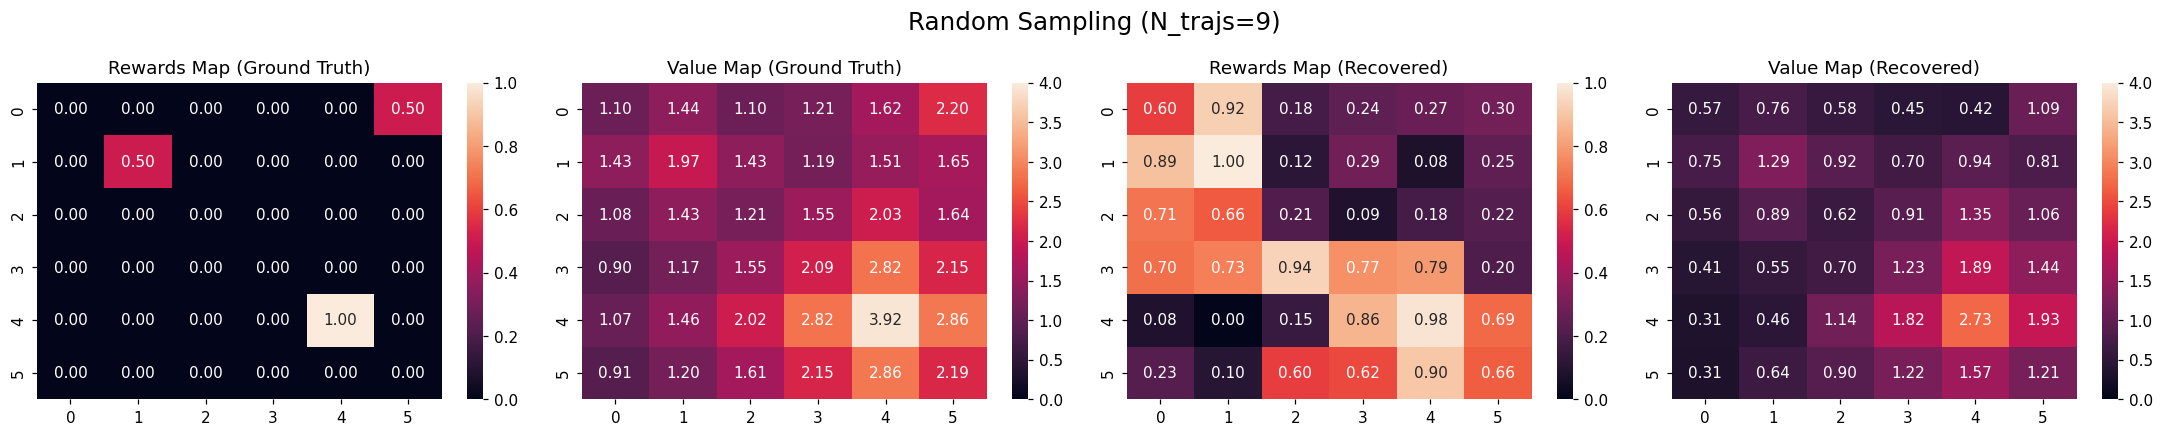

In [17]:
visualizer = Visualizer(history_deepmaxent_random, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)

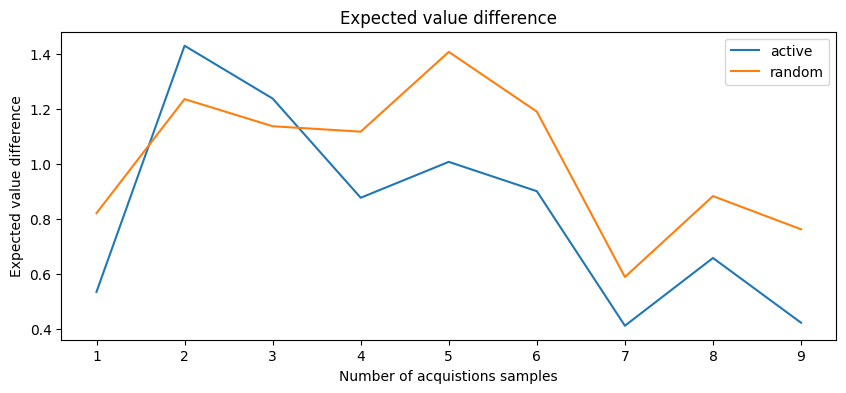

In [18]:
evd_act = get_evd(history_deepmaxent_active)
evd_rand = get_evd(history_deepmaxent_random)
draw_evd(evd_act[None, :], evd_rand[None, :])